In [9]:
import pandas as pd
from food.psql import *
from food.tools import *

In [12]:
df = pd.read_sql('select * from dishes',engine).set_index('timestamp')
total_unique_users = len(df.drop_duplicates('user_id')['food_id']);total_unique_users

35

In [13]:
df = df.reset_index()
df['min_timestamp'] = df['timestamp'].dt.date
df['max_timestamp'] = df['timestamp'].dt.date
days_used = df.groupby('user_id').agg({'min_timestamp':'min','max_timestamp':'max'})
days_used['days_used'] = (days_used['max_timestamp'] - days_used['min_timestamp']).dt.days
days_used.sort_values(['days_used','max_timestamp'],ascending=False).head(10)

,min_timestamp,max_timestamp,days_used
user_id,,,
78882798,2022-04-05,2022-04-09,4
333133495,2022-04-05,2022-04-07,2
143791,2022-04-06,2022-04-07,1
347300081,2022-04-06,2022-04-07,1
112833890,2022-04-09,2022-04-09,0
5206848623,2022-04-09,2022-04-09,0
154177176,2022-04-07,2022-04-07,0
187967661,2022-04-07,2022-04-07,0
252883064,2022-04-07,2022-04-07,0


In [14]:
df[df['user_id']==5206848623]

,timestamp,food_id,description,category,energy,protein,carb,fat,score,image_url,user_id,grams,measure_selected,min_timestamp,max_timestamp
129,2022-04-09 00:54:40.095673+00:00,1104045,Date candy,Candy not containing chocolate,3008.502,33.57774,461.1978,143.20152,0.229795,https://api.telegram.org/file/bot5203882708:AA...,5206848623,793.8,28,2022-04-09,2022-04-09
130,2022-04-09 00:57:46.350057+00:00,1100906,"Cake or cupcake, chocolate, devil's food or fu...",Cakes and pies,2551.840,22.82880,346.6304,131.52800,0.261320,https://api.telegram.org/file/bot5203882708:AA...,5206848623,656.0,1,2022-04-09,2022-04-09


In [10]:
images = df[df['user_id']==112833890]['image_url'].apply(get_image_from_url).tolist()

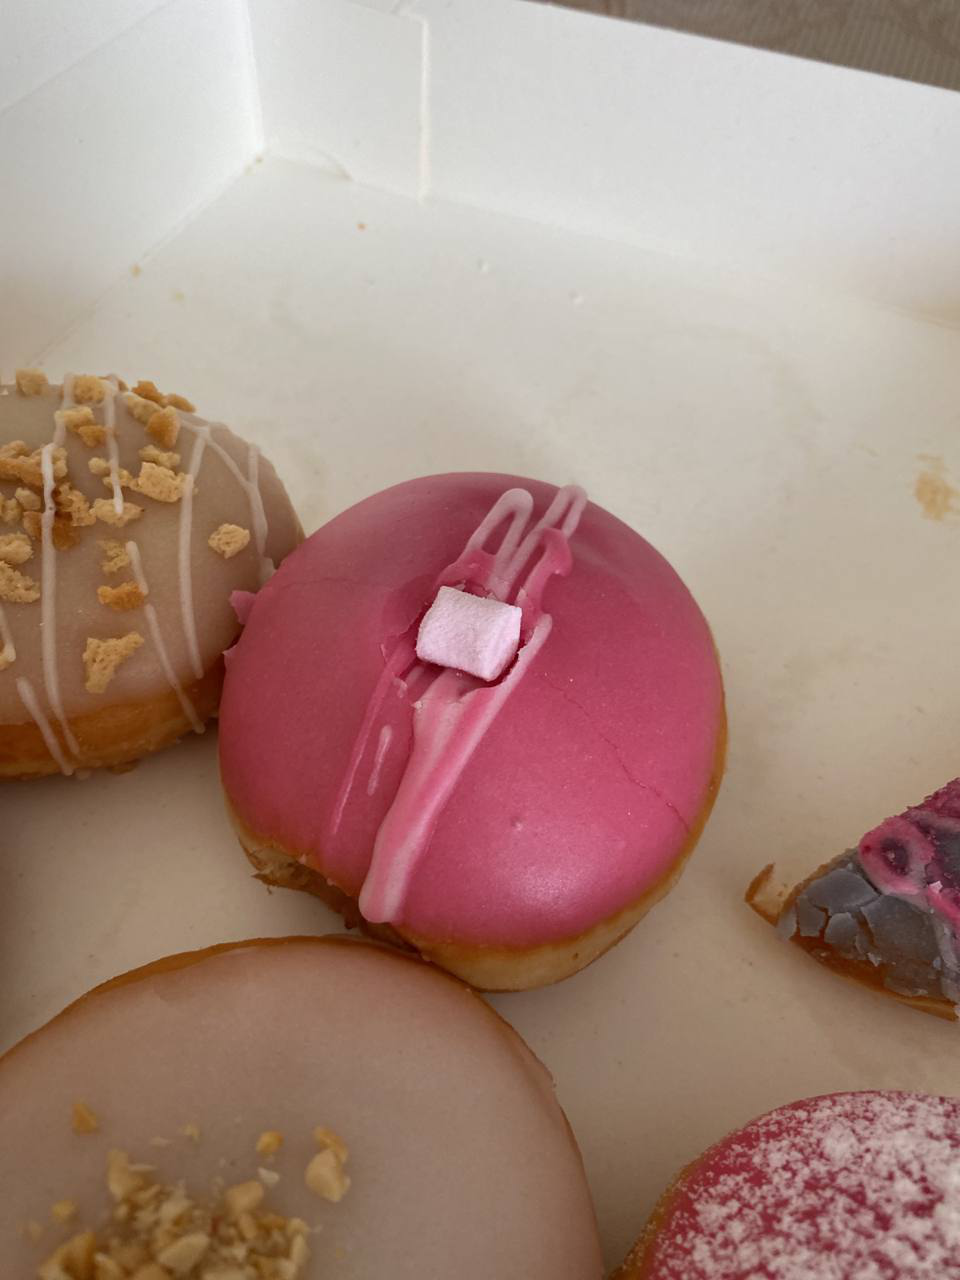

In [11]:
images[0]